In [1]:
#program to find negation of grayscale image(using cv2)
import cv2
img = cv2.imread("sunflower.jpg",0)

In [ ]:
if img is not None:
    cv2.imshow('Original Image',img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Error:Failed to load the image")

In [2]:
rows,cols = img.shape

In [4]:
rows

427

In [ ]:
cols

In [3]:
for i in range(rows):
    for j in range(cols):
        img[i,j] = 255-img[i,j]
if img is not None:
    cv2.imshow('Original Image',img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Error:Failed to load the image")

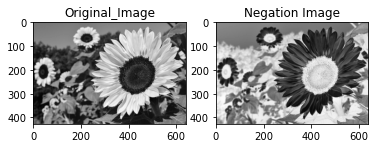

In [16]:
#program to find negation of grayscale image(using matplotlib)
import matplotlib.pyplot as plt
import cv2
img = cv2.imread("sunflower.jpg")
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.subplot(1,2,1)
plt.title("Original_Image")
plt.imshow(gray_image,cmap='gray')

rows,cols = gray_image.shape
for i in range(rows):
    for j in range(cols):
        gray_image[i,j] = 255-gray_image[i,j]
plt.subplot(1,2,2)
plt.title('Negation Image')
plt.imshow(gray_image,cmap='gray')


Enter the negation value (0-255): 30


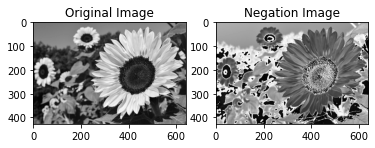

In [1]:
import matplotlib.pyplot as plt
import cv2

def negate_image(gray_image, negation_value):
    rows, cols = gray_image.shape
    for i in range(rows):
        for j in range(cols):
            gray_image[i, j] = negation_value - gray_image[i, j]
    return gray_image

def main():
    img_path = "sunflower.jpg"
    negation_value = int(input("Enter the negation value (0-255): "))
    
    img = cv2.imread(img_path)
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(gray_image, cmap='gray')
    if negation_value<0 or negation_value>255:
        print('Enter value between 0 and 255')
    else:
        negated_image = negate_image(gray_image, negation_value)
    
    plt.subplot(1, 2, 2)
    plt.title('Negation Image')
    plt.imshow(negated_image, cmap='gray')
    
    plt.show()

main()


Enter the path of the image: sunflower.jpg
Enter the negation value (0-255): 45


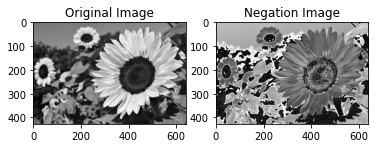

In [6]:
import matplotlib.pyplot as plt
import cv2

def negate_image(img, negation_value):
    rows, cols = img.shape
    for i in range(rows):
        for j in range(cols):
            img[i, j] = negation_value - img[i, j]
    return img

def main():
    img_path = input("Enter the path of the image: ")
    negation_value = int(input("Enter the negation value (0-255): "))
    
    img = cv2.imread(img_path)
    if img is None:
        print("Error: Could not read the image. Please check the file path.")
        return
    
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(gray_image, cmap='gray')
    
    if negation_value<0 or negation_value>255:
        print('Enter value between 0 and 255')
    else:
        negated_image = negate_image(gray_image, negation_value)
    
    plt.subplot(1, 2, 2)
    plt.title('Negation Image')
    plt.imshow(negated_image, cmap='gray')
    plt.show()
main()


In [9]:
#taking 255 value as user input(using cv2)
import matplotlib.pyplot as plt
import cv2
import os
import random

def display(img):
    if img is not None:
        cv2.imshow('Image', img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    else:
        print("Failed to load image")

def find_negation(img, x):
    rows, cols = img.shape
    for i in range(rows):
        for j in range(cols):
            img[i,j] = x - img[i,j]
    display(img)
image_path = input("Enter a image file :: ")
if os.path.exists(image_path):
    img = cv2.imread(image_path, 0)
    display(img)
    x = int(input("Enter a number between 0 and 255 :: "))
    if x < 0 or x > 255:
        print("Please enter a value between 0 and 255")
    else:
        find_negation(img , x)
else:
    print("Image does not exist")



Enter a image file :: sunflower.jpg
Enter a number between 0 and 255 :: 30


In [14]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def negate_image(file_path):
    try:
        # For text files
        if file_path.endswith('.txt'):
            with open(file_path, 'r') as file:
                # Read the ASCII art from the text file
                ascii_art = file.read()

            # Convert ASCII art to image representation
            # This is a simplified example assuming each character represents a pixel
            # You may need to adjust this depending on the actual format of your text file
            image_data = []
            for line in ascii_art.split('\n'):
                row = []
                for char in line:
                    # Assuming char represents brightness, negate it
                    negated_brightness = 255 - ord(char)
                    row.append((negated_brightness, negated_brightness, negated_brightness))
                image_data.append(row)

            # Create a PIL Image object from the negated image data
            negated_image = Image.new('RGB', (len(image_data[0]), len(image_data)))
            for y, row in enumerate(image_data):
                for x, pixel in enumerate(row):
                    negated_image.putpixel((x, y), pixel)

        # For image files
        elif file_path.endswith(('.jpg', '.jpeg', '.png', '.bmp')):
            # Open the image using PIL
            image = Image.open(file_path)

            # Convert image to grayscale and negate it
            negated_image = Image.eval(image, lambda x: 255 - x)

        # For video files
        elif file_path.endswith(('.mp4', '.avi', '.mov')):
            # Open video file using OpenCV
            cap = cv2.VideoCapture(file_path)

            # Read the first frame
            ret, frame = cap.read()

            # Convert frame to grayscale and negate it
            negated_frame = cv2.bitwise_not(cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY))

            # Convert numpy array to PIL Image
            negated_image = Image.fromarray(negated_frame)

            # Release the video capture object
            cap.release()

        else:
            print("Unsupported file type.")
            return

        # Convert PIL Image to NumPy array
        negated_array = np.array(negated_image)

        # Plot the negated image
        plt.imshow(negated_array)
        plt.axis('off')
        plt.show()

    except FileNotFoundError:
        print("File not found. Please enter a valid file path.")


# Allow the user to input the file path dynamically
file_path = input("Enter the path to the file: ")
negate_image(file_path)

Enter the path to the file: text.txt


IndexError: image index out of range

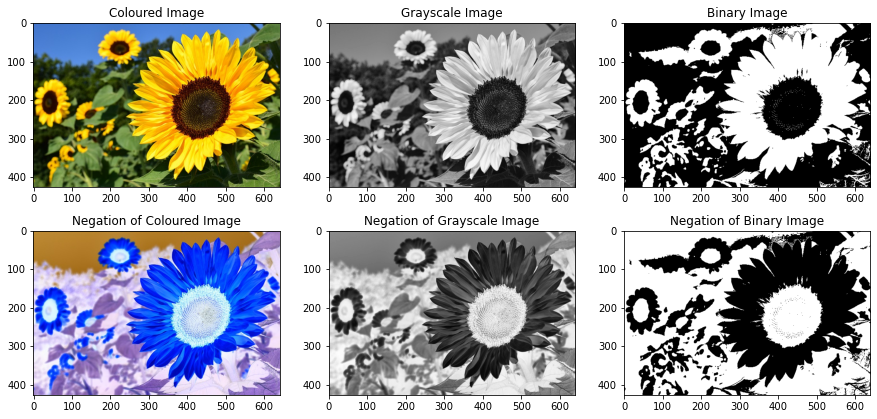

In [13]:
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('sunflower.jpg')
rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

plt.figure(figsize=(15, 7))
plt.subplot(2,3,1)
plt.imshow(rgb_image)
plt.title("Coloured Image")

gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

plt.subplot(2,3,2)
plt.imshow(gray_image, cmap = 'gray')
plt.title("Grayscale Image")

_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

plt.subplot(2,3,3)
plt.imshow(binary_image, cmap = 'gray')
plt.title("Binary Image")

b, g, r = cv2.split(rgb_image)
neg_b = 255 - b
neg_g = 255 - g
neg_r = 255 - r

# Merge the negated color channels
negated_image = cv2.merge((neg_b, neg_g, neg_r))

rows, cols = gray_image.shape

for i in range(rows):
    for j in range(cols):
        gray_image[i,j] = 255 - gray_image[i,j]
        
negated_binary_image = cv2.bitwise_not(binary_image)        

plt.subplot(2,3,4)
plt.title("Negation of Coloured Image")
plt.imshow(negated_image)

plt.subplot(2,3,5)
plt.title("Negation of Grayscale Image")
plt.imshow(gray_image, cmap = 'gray')

plt.subplot(2,3,6)
plt.title("Negation of Binary Image")
plt.imshow(negated_binary_image, cmap = 'gray')